# Load dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nola.csv')
df.head()

,Unnamed: 0,70115,70130,70118,70005,70131
0,1996-04-01,131700.0,111600.0,87900.0,131000.0,90900.0
1,1996-05-01,132900.0,112800.0,88700.0,133000.0,91900.0
2,1996-06-01,134200.0,114100.0,89700.0,135200.0,92800.0
3,1996-07-01,135700.0,115400.0,90800.0,137400.0,93800.0
4,1996-08-01,137300.0,116800.0,91900.0,139400.0,94600.0


## Resetting index to datetime

In [3]:
df = df.set_index('Unnamed: 0')
df.index.name = None
df.head()

,70115,70130,70118,70005,70131
1996-04-01,131700.0,111600.0,87900.0,131000.0,90900.0
1996-05-01,132900.0,112800.0,88700.0,133000.0,91900.0
1996-06-01,134200.0,114100.0,89700.0,135200.0,92800.0
1996-07-01,135700.0,115400.0,90800.0,137400.0,93800.0
1996-08-01,137300.0,116800.0,91900.0,139400.0,94600.0


In [4]:
df.index.dtype

dtype('O')

In [5]:
df.index = pd.to_datetime(df.index, format='%Y-%m')
df.index.dtype

dtype('<M8[ns]')

In [6]:
df.head()

,70115,70130,70118,70005,70131
1996-04-01,131700.0,111600.0,87900.0,131000.0,90900.0
1996-05-01,132900.0,112800.0,88700.0,133000.0,91900.0
1996-06-01,134200.0,114100.0,89700.0,135200.0,92800.0
1996-07-01,135700.0,115400.0,90800.0,137400.0,93800.0
1996-08-01,137300.0,116800.0,91900.0,139400.0,94600.0


Seeing how zips are correlated

In [7]:
df.corr()

,70115,70130,70118,70005,70131
70115,1.000000,0.994486,0.993545,0.934380,0.750207
70130,0.994486,1.000000,0.989503,0.939447,0.759486
70118,0.993545,0.989503,1.000000,0.939456,0.785046
70005,0.934380,0.939447,0.939456,1.000000,0.868880
70131,0.750207,0.759486,0.785046,0.868880,1.000000


## Checking stationarity

Checking just 70115 at first

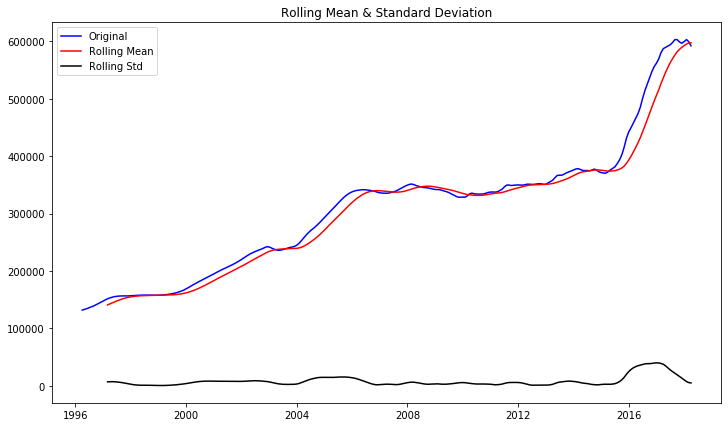

In [8]:
roll_mean = df['70115'].rolling(window=12, center=False).mean()
roll_std = df['70115'].rolling(window=12, center=False).std()


fig = plt.figure(figsize=(12,7))
plt.plot(df['70115'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The rolling mean is not constant over time, so this shows the data for this zip isn't stationary. The other zips I'm sure aren't either.

### Dickey Fuller

In [9]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['70115'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   0.548565
p-value                          0.986277
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


P-value is way over 5%, so it's not stationary

I'll also try it for 70131, which had the least rise of my dataset.


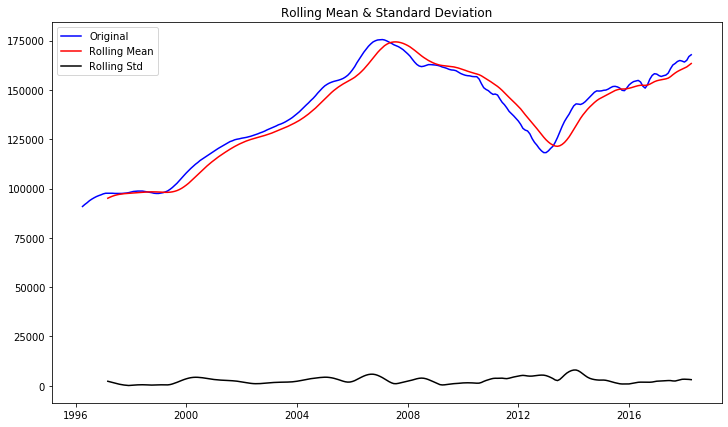

In [10]:
roll_mean = df['70131'].rolling(window=12, center=False).mean()
roll_std = df['70131'].rolling(window=12, center=False).std()


fig = plt.figure(figsize=(12,7))
plt.plot(df['70131'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [11]:
dftest = adfuller(df['70131'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.000807
p-value                          0.286220
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


P-value is much lower but still way over 5%. Not stationary. 

### Make a function for the stationarity check

In [12]:
def stationarity_check(data):
#     zip = '{}'.format(zip)
    
    # Calculate rolling statistics
    roll_mean = data.rolling(window=8, center=False).mean()
    roll_std = data.rolling(window=8, center=False).std()
  
    dftest = adfuller(data)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

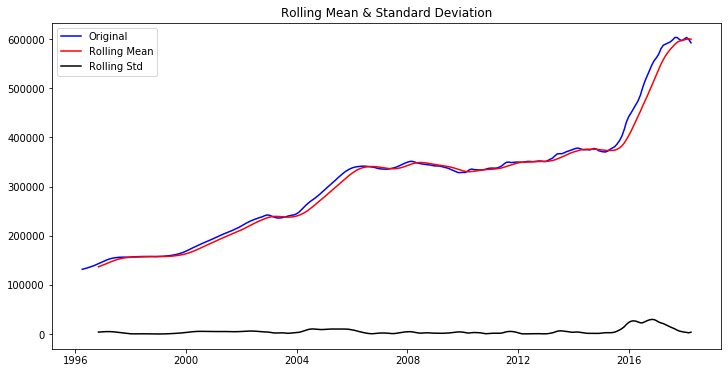

Results of Dickey-Fuller Test: 

Test Statistic                   0.548565
p-value                          0.986277
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [13]:
stationarity_check(df['70115'])

## Make individual dataframes for each zip

In [14]:
uptown = df['70115']
uptown.head()

1996-04-01    131700.0
1996-05-01    132900.0
1996-06-01    134200.0
1996-07-01    135700.0
1996-08-01    137300.0
Name: 70115, dtype: float64

In [15]:
lgd = df['70130']
lgd.head()

1996-04-01    111600.0
1996-05-01    112800.0
1996-06-01    114100.0
1996-07-01    115400.0
1996-08-01    116800.0
Name: 70130, dtype: float64

In [16]:
audubon = df['70118']

In [17]:
metairie = df['70005']

In [18]:
aurora = df['70131']

#### Saving new dfs

In [19]:
# Commenting out so I won't keep re-saving when re-running notebook

# uptown.to_csv(r'../data/uptown.csv', index=True)
# lgd.to_csv(r'../data/lgd.csv', index=True)
# audubon.to_csv(r'../data/audubon.csv', index=True)
# metairie.to_csv(r'../data/metairie.csv', index=True)
# aurora.to_csv(r'../data/aurora.csv', index=True)

# Trying Various Ways of Removing Trends

## Square Root Transform

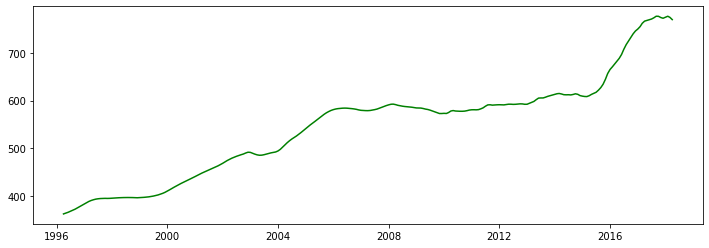

In [20]:
uptown_sqrt = np.sqrt(uptown)
fig = plt.figure(figsize=(12,4))
plt.plot(uptown_sqrt, color='green');

Doesn't seem to change much.

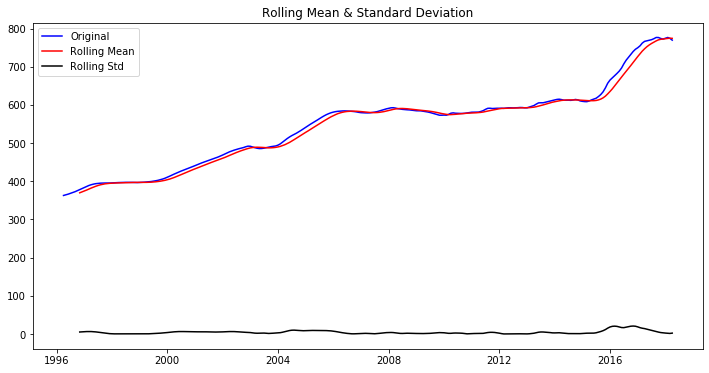

Results of Dickey-Fuller Test: 

Test Statistic                  -0.181322
p-value                          0.940712
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [21]:
stationarity_check(uptown_sqrt)

Still has a high p-value. 

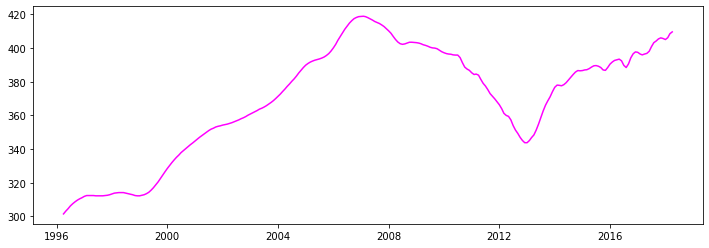

In [22]:
aurora_sqrt = np.sqrt(aurora)
fig = plt.figure(figsize=(12,4))
plt.plot(aurora_sqrt, color='magenta');

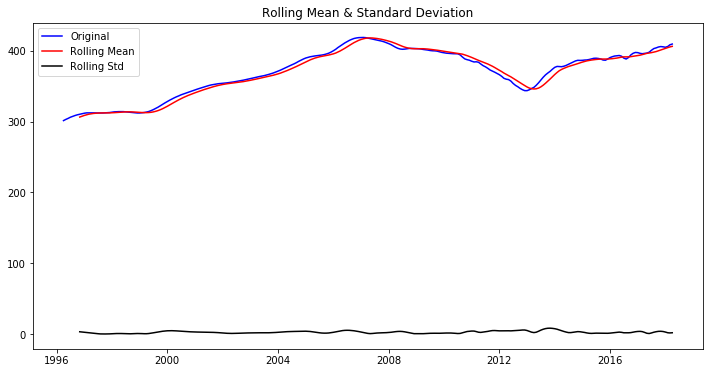

Results of Dickey-Fuller Test: 

Test Statistic                  -2.012807
p-value                          0.280986
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [23]:
stationarity_check(aurora_sqrt)

This one has a high p-value too. Won't bother with square root transformations.

# Root Transformations

## Uptown

In [24]:
uptown.head()

1996-04-01    131700.0
1996-05-01    132900.0
1996-06-01    134200.0
1996-07-01    135700.0
1996-08-01    137300.0
Name: 70115, dtype: float64

In [25]:
uptown_sqrt.head()

1996-04-01    362.904946
1996-05-01    364.554523
1996-06-01    366.333182
1996-07-01    368.374809
1996-08-01    370.540146
Name: 70115, dtype: float64

In [26]:
# Testing if it worked
np.power(uptown, 1/2) == uptown_sqrt

1996-04-01    True
1996-05-01    True
1996-06-01    True
1996-07-01    True
1996-08-01    True
              ... 
2017-12-01    True
2018-01-01    True
2018-02-01    True
2018-03-01    True
2018-04-01    True
Name: 70115, Length: 265, dtype: bool

In [27]:
dftest = adfuller(uptown_sqrt)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)
# Just test for p-value
print(f"p-value: {round(dftest[1], 3)}")

Results of Dickey-Fuller test: 

Test Statistic                  -0.181322
p-value                          0.940712
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
p-value: 0.941


Make a function to cycle through taking roots

In [28]:
def root_transform(df):
    power = 2
    root = 1/power
    
    # make first root transformation
    transformed_df = np.power(df, root)
    
    # get first p-value
    dftest = adfuller(transformed_df)
    p_val = dftest[1]
    print(f'last entry in df is {transformed_df[-1]}')
    
    while p_val > 0.05:
        power += 1
        print(f"power is {power}")
        root = 1/power
        transformed_df = np.power(df, root)
        print(f'first entry in df is {transformed_df[0]}')
        dftest = adfuller(transformed_df)
        p_val = dftest[1]
        print(f'p-value is {p_val}')
    
    print(f"p-value: {round(dftest[1], 3)}")
    return None

When I run `root_transform(uptown)` the p-value bottoms out at around .74 and the function gets stuck in an infinite loop as the power keeps increasing. I can't do root transformation.

## Rolling Mean

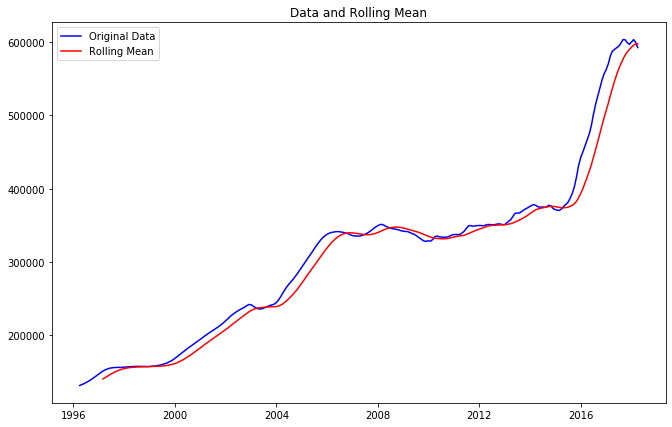

In [29]:
roll_mean = uptown.rolling(window=12, center=False).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(uptown, color='blue', label='Original Data')
plt.plot(roll_mean, color='red', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Data and Rolling Mean')
plt.show()

In [30]:
# Checking out new series
uptown_minus_roll_mean = uptown - roll_mean
uptown_minus_roll_mean[0:12]

1996-04-01             NaN
1996-05-01             NaN
1996-06-01             NaN
1996-07-01             NaN
1996-08-01             NaN
1996-09-01             NaN
1996-10-01             NaN
1996-11-01             NaN
1996-12-01             NaN
1997-01-01             NaN
1997-02-01             NaN
1997-03-01    10616.666667
Name: 70115, dtype: float64

In [31]:
uptown_minus_roll_mean[11]

10616.666666666657

In [32]:
# Taking out the NaNs
uptown_minus_roll_mean = uptown_minus_roll_mean[11:]

dftest = adfuller(uptown_minus_roll_mean)
print(dftest[1])

0.171760079386862


In [33]:
roll_mean = uptown.rolling(window=2, center=False).mean()
uptown_minus_roll_mean = uptown - roll_mean
print(uptown_minus_roll_mean[0:15])
uptown_minus_roll_mean.dropna(inplace=True)
dftest = adfuller(uptown_minus_roll_mean)
print(dftest[1])

1996-04-01       NaN
1996-05-01     600.0
1996-06-01     650.0
1996-07-01     750.0
1996-08-01     800.0
1996-09-01     850.0
1996-10-01    1000.0
1996-11-01    1000.0
1996-12-01    1100.0
1997-01-01    1100.0
1997-02-01    1050.0
1997-03-01     900.0
1997-04-01     800.0
1997-05-01     600.0
1997-06-01     500.0
Name: 70115, dtype: float64
0.0019658611237334624


Low p-value, which is what I want

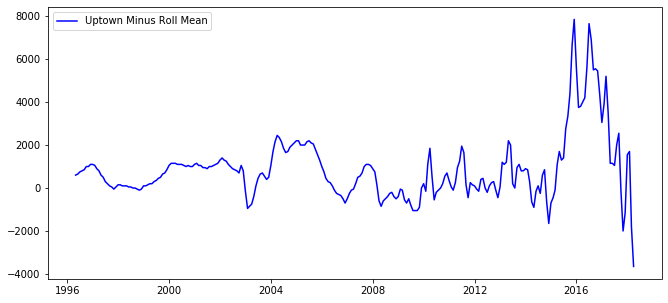

In [34]:
fig = plt.figure(figsize=(11,5))
plt.plot(uptown_minus_roll_mean, color='blue', label='Uptown Minus Roll Mean')
plt.legend(loc='best')
plt.show()

### Make a function for rolling mean subtraction

In [35]:
def rolling_mean_subtraction(df, window):
    roll_mean = df.rolling(window=window).mean()
    df_minus_roll_mean = df - roll_mean
    df_minus_roll_mean.dropna(inplace=True)
    
    dftest = adfuller(df_minus_roll_mean)
    p_val = dftest[1]
    
    return (f"p-value: {round(dftest[1], 3)} for window of {window}")

#### Uptown

In [36]:
rolling_mean_subtraction(uptown, 2)

'p-value: 0.002 for window of 2'

#### LGD

In [37]:
rolling_mean_subtraction(lgd, 2)

'p-value: 0.083 for window of 2'

Too high

In [38]:
rolling_mean_subtraction(lgd, 3)

'p-value: 0.139 for window of 3'

In [39]:
rolling_mean_subtraction(lgd, 4)

'p-value: 0.128 for window of 4'

In [40]:
rolling_mean_subtraction(lgd, 5)

'p-value: 0.117 for window of 5'

Seems best is 2 for lgd

#### Audubon

In [41]:
rolling_mean_subtraction(audubon, 2)

'p-value: 0.023 for window of 2'

#### Metairie

In [42]:
rolling_mean_subtraction(metairie, 2)

'p-value: 0.064 for window of 2'

In [43]:
rolling_mean_subtraction(metairie, 3)

'p-value: 0.129 for window of 3'

In [44]:
rolling_mean_subtraction(metairie, 4)

'p-value: 0.055 for window of 4'

In [45]:
rolling_mean_subtraction(metairie, 5)

'p-value: 0.039 for window of 5'

#### Aurora 

In [46]:
rolling_mean_subtraction(aurora, 2)

'p-value: 0.141 for window of 2'

In [47]:
rolling_mean_subtraction(aurora, 3)

'p-value: 0.096 for window of 3'

In [48]:
rolling_mean_subtraction(aurora, 4)

'p-value: 0.067 for window of 4'

In [49]:
rolling_mean_subtraction(aurora, 5)

'p-value: 0.045 for window of 5'

### Rolling mean windows to make dataframes stationary

- Uptown: 2
- LGD: 2
- Audubon: 2
- Metairie: 5
- Aurora: 5

## Differencing

In [50]:
# Make function

def difference_df(df, periods):
    differenced_df = df.diff(periods=periods)
    differenced_df.dropna(inplace=True)
    
    dftest = adfuller(differenced_df)
    p_val = dftest[1]
    
    return (f"p-value: {round(dftest[1], 3)} for period of {periods}")

In [51]:
difference_df(uptown, 1)

'p-value: 0.002 for period of 1'

In [52]:
difference_df(lgd, 1)

'p-value: 0.083 for period of 1'

In [53]:
difference_df(lgd, 2)

'p-value: 0.019 for period of 2'

In [54]:
difference_df(audubon, 1)

'p-value: 0.023 for period of 1'

In [55]:
difference_df(metairie, 2)

'p-value: 0.027 for period of 2'

In [56]:
difference_df(aurora, 1)

'p-value: 0.141 for period of 1'

In [57]:
difference_df(aurora, 2)

'p-value: 0.115 for period of 2'

In [58]:
difference_df(aurora, 3)

'p-value: 0.028 for period of 3'

### Differencing periods to make dataframes stationary

- Uptown: 1
- LGD: 2
- Audubon: 1
- Metairie: 2
- Aurora: 3

When modeling, I'll use differencing for stationarity because it works well with ARIMA.

# Checking Correlation

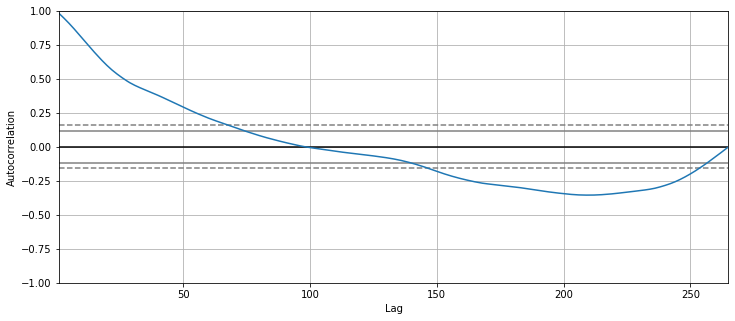

In [59]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(uptown)

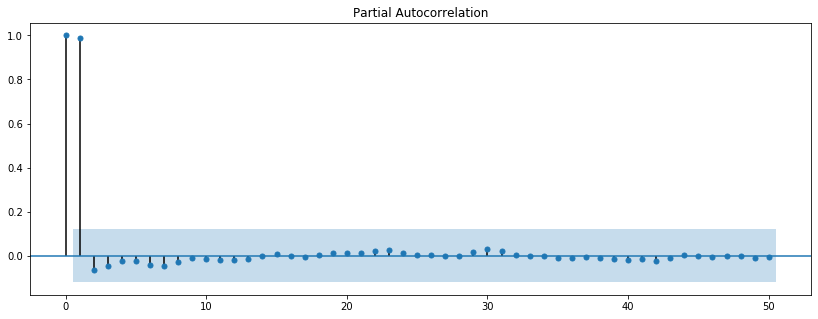

In [60]:
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

rcParams['figure.figsize'] = 14, 5
plot_pacf(uptown, lags=50);

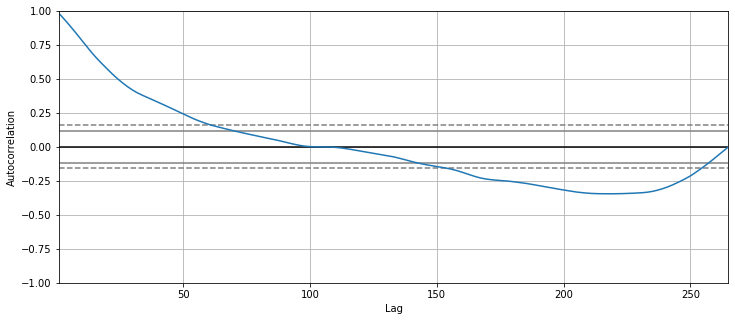

In [61]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(lgd)

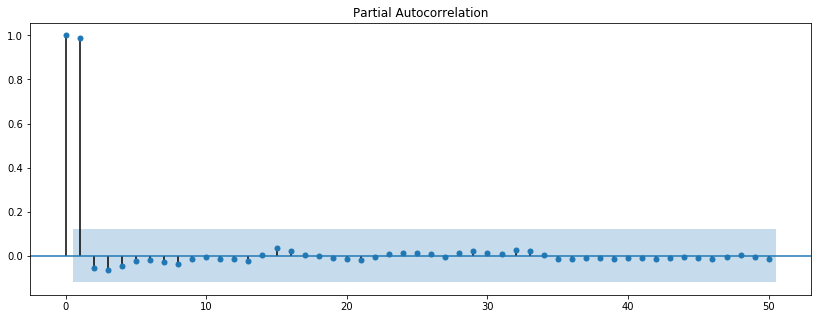

In [62]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(lgd, lags=50);